Nama: Immanuella Senja Dwi Febriani  
NIM: 1306620006  
Fisika 2020  
Tugas Pengolahan Citra Digital

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow 
import time
from scipy import ndimage, misc, signal

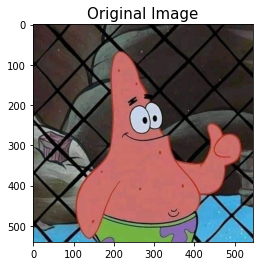

In [20]:
img = cv.imread('/content/patrick.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.title('Original Image', fontsize=15)
plt.imshow(img_rgb)

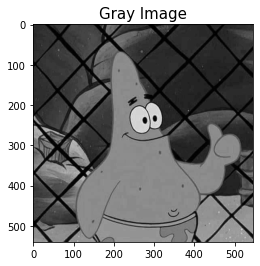

In [19]:
gray_img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.title('Gray Image', fontsize=15)
plt.imshow(gray_img, cmap=plt.cm.gray)

In [56]:
def rotate90Clockwise(A):
    N = len(A[0])
    for i in range(N // 2):
        for j in range(i, N - i - 1):
            temp = A[i][j]
            A[i][j] = A[N - 1 - j][i]
            A[N - 1 - j][i] = A[N - 1 - i][N - 1 - j]
            A[N - 1 - i][N - 1 - j] = A[j][N - 1 - i]
            A[j][N - 1 - i] = temp
    return A

In [61]:
#Kernel edge untuk sumbu x dan y
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
rotasi_kernel90 = rotate90Clockwise(kernel.copy())

#rotasi kernel edge untuk sumbu x dan y
rotasi_kernel180 = kernel.copy()
for i in range(2):
  rotate90Clockwise(rotasi_kernel180)
rotasi_kernel270 = rotate90Clockwise(rotasi_kernel180.copy())


Text(0.5, 1.0, 'Rotasi Konvolusi dan Korelasi')

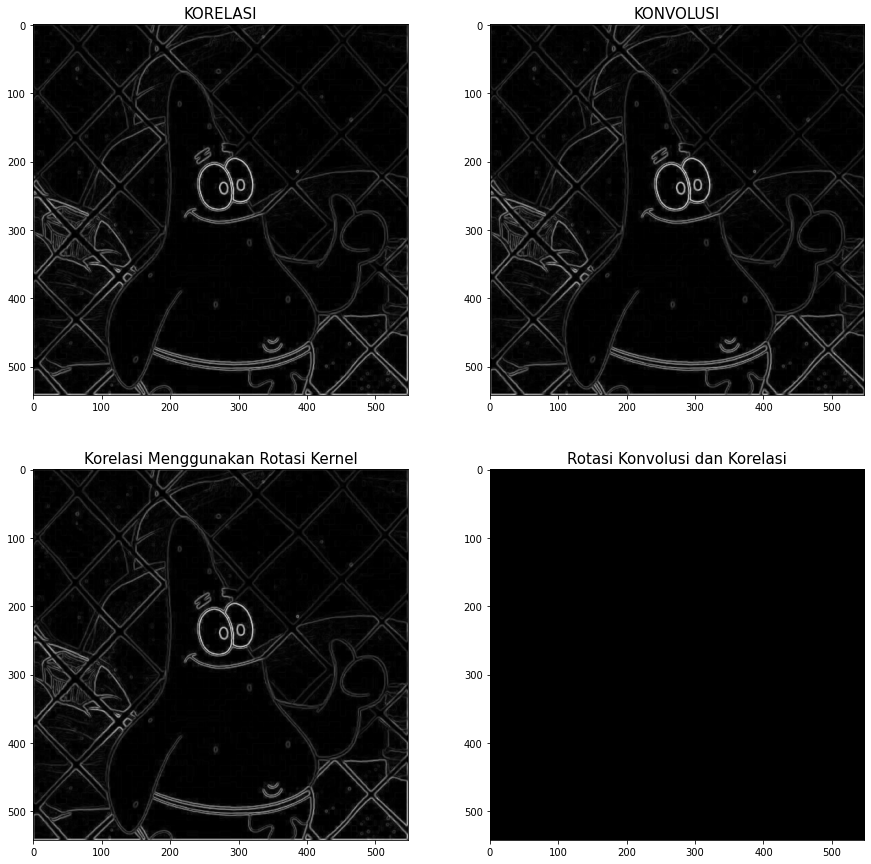

In [70]:
#Deteksi sumbu x dan y
konvolusi_x = signal.convolve2d(gray_img,kernel)
konvolusi_y = signal.convolve2d(gray_img,rotasi_kernel90)

#korelasi sumbu x dan y
korelasi_x = signal.correlate2d(gray_img,kernel)
korelasi_y = signal.correlate2d(gray_img,rotasi_kernel90)

#hasil dari x dan y
hasil_konvolusi = np.sqrt(konvolusi_x*konvolusi_x + konvolusi_y*konvolusi_y)
hasil_korelasi = np.sqrt(korelasi_x*korelasi_x + korelasi_y*korelasi_y)

#rotasi korelasi
rotasi_korelasi_x = signal.correlate2d(gray_img, rotasi_kernel180)
rotasi_korelasi_y = signal.correlate2d(gray_img, rotasi_kernel270)

hasil_rotasi = np.sqrt(rotasi_korelasi_x*rotasi_korelasi_x + rotasi_korelasi_y*rotasi_korelasi_y)

minus = hasil_konvolusi - hasil_rotasi

#menampilkan hasil
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(hasil_korelasi, cmap=plt.cm.gray)
plt.title("KORELASI", fontsize=15)

plt.subplot(222)
plt.imshow(hasil_konvolusi, cmap=plt.cm.gray)
plt.title("KONVOLUSI", fontsize=15)

plt.subplot(223)
plt.imshow(hasil_rotasi, cmap=plt.cm.gray)
plt.title("Korelasi Menggunakan Rotasi Kernel", fontsize=15)

plt.subplot(224)
plt.imshow(minus, cmap=plt.cm.gray)
plt.title("Rotasi Konvolusi dan Korelasi", fontsize=15)

Teori Konvolusi  
Operasi yang mendasar dalam pengolahan citra adalah operasi konvolusi. Konvolusi 2 fungsi f(x) dan g(x) didefinisikan sebagai berikut:  
$$ h(x)=f(x)*g(x)= \int \limits_{-\infty}^{\infty}f(a)g(x-a)da $$  
yang dalam hal ini tanda * menyatakan operasi konvolusi, dan peubah (variabel) a adalah peubah bantu (dummy variabel).  
untuk fungsi diskrit, konvolusi didefinisikan sebagai  
$$ h(x) = f(x)*g(x) = \sum_{a=-\infty }^{\infty} f(a)g(x-a) $$  
g(x) disebut kernel konvolusi atau kernel penapis (filter). Kernel g(x) merupakan suatu jendela yang dioperasikan secara bergeser pada sinyal masukkan f(x), yang dalam hal ini, jumlah perkalian kedua fungsi pada setiap titik merupakan hasil konvolusi yang dinyatakan dengan keluaran h(x).  

Nilai kernel yang digunakan ialah:  
$$ \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}$$

Kemudian diputar $180^o$ sehingga nilai dari kernel akan menjadi:

$$ \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}$$  

Dapat disimpulkan bahwa hasil gambar korelasi rotasi memiliki kesamaan dengan konvolusi dan apabila kedua nilai tersebut dikurangi maka gambar akan menjadi hitam, artinya semua nilali pixelnya 0.

Text(0.5, 1.0, 'Konvolusi Direct 0.02111s')

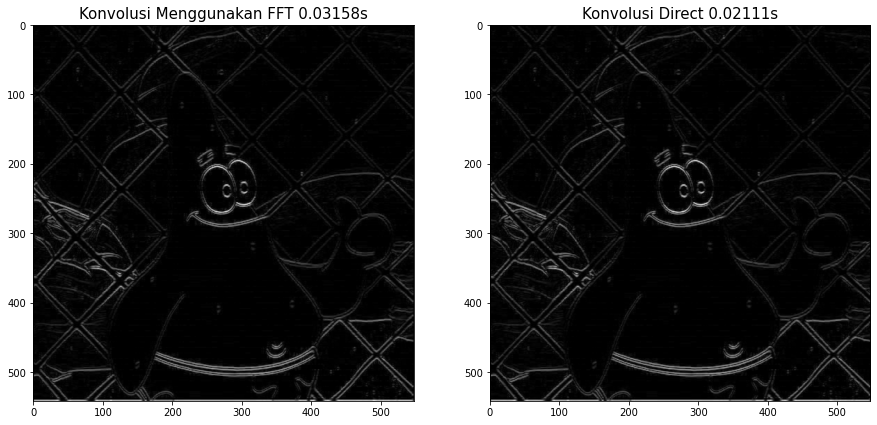

In [73]:
#FFT
awal = time.time()
konvolusi_fft = signal.fftconvolve(gray_img,kernel)
konvolusi_fft = np.sqrt(konvolusi_fft*konvolusi_fft)
akhir = time.time()
waktu_fft = akhir - awal

#Direct
awal = time.time()
konvolusi_dir = signal.convolve(gray_img,kernel)
konvolusi_dir = np.sqrt(konvolusi_dir*konvolusi_dir)
akhir = time.time()
waktu_dir = akhir - awal

#menampilkan hasil
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(konvolusi_fft, cmap=plt.cm.gray)
plt.title(f'Konvolusi Menggunakan FFT {waktu_fft:.5f}s',fontsize=15)

plt.subplot(122)
plt.imshow(konvolusi_dir, cmap=plt.cm.gray)
plt.title(f'Konvolusi Direct {waktu_dir:.5f}s', fontsize=15)

Dari percobaan di atas, dapat disimpulkan bahwa pada konvolusi secara langsung meiliki waktu yang berlangsung lebih cepat daripada dengan konvolusi menggunakan FFT.